
# Sesión 1: Números Complejos 
**Fecha:** 26/08 – 6pm  
**Tema central:** forma binómica, polar, módulo, argumento y Euler.

---

Este cuadernillo es tu guía completa para la primera sesión de matemáticas en el curso Introducción a la Computación Cuántica.  
La idea es que lo uses como **libro de consulta**: contiene teoría, ejemplos resueltos, ejercicios propuestos y un toque de aplicaciones en cuántica.



## 1. Motivación y contexto  

En la evolución de los sistemas numéricos:  

- Los **enteros** permitieron contar y restar.  
- Los **racionales** permitieron dividir.  
- Los **irracionales** aparecieron al calcular longitudes como la diagonal de un cuadrado.  
- Los **números complejos** surgieron al resolver ecuaciones que requerían raíces cuadradas de números negativos.  

> **Pregunta motivadora:** ¿Qué número real elevado al cuadrado da -1?  
> Ninguno. Por eso definimos la unidad imaginaria ( $i = \sqrt{-1}$ ).  

En **física cuántica**, no solo usamos números complejos: los necesitamos.  
**Nota**: La probabilidad de observar un estado está dada por el **módulo al cuadrado** de un número complejo.



## 2. Números imaginarios y la unidad imaginaria  

- Un **número imaginario** es un número que al elevarse al cuadrado da un número negativo.  
- Definimos la **unidad imaginaria**:  

$ i = \sqrt{-1} $  

Cualquier número imaginario se puede escribir como:  

$ bi \quad \text{donde } b \in \mathbb{R} $


In [72]:

# Verificación con Python
i = complex(0,1)
i_squared = i**2
i, i_squared


(1j, (-1+0j))


## 3. Números complejos: Forma binómica o rectangular  

Un **número complejo** es de la forma:  

$ z = a + bi $  

donde:  
- $a$ = parte real  
- $b$ = parte imaginaria  

Representación en el plano complejo: punto con coordenadas (a, b).


In [73]:

# Ejemplo en Python
z = complex(3, -4)
z.real, z.imag


(3.0, -4.0)

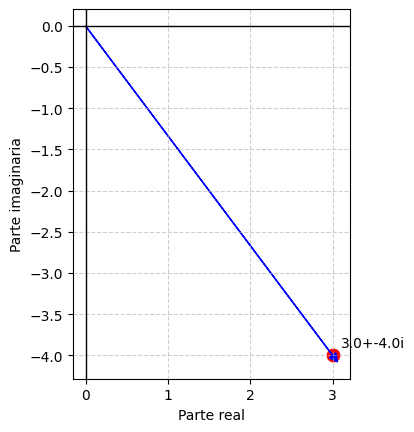

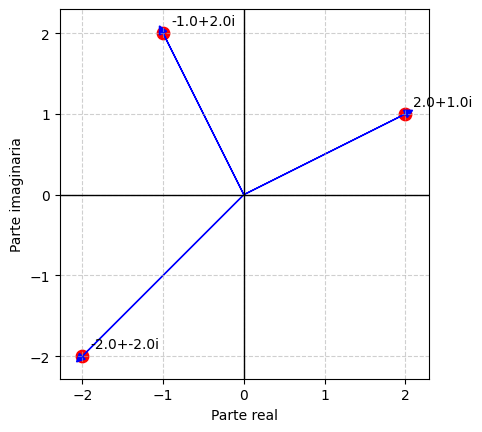

In [74]:
import matplotlib.pyplot as plt

def plot_complex(nums, show_axes=True, grid=True):
    """
    Grafica uno o varios números complejos en el plano cartesiano.
    
    Parámetros:
    -----------
    nums : complex o lista de complex
        Número(s) complejo(s) a graficar.
    show_axes : bool
        Si True, dibuja los ejes reales e imaginarios.
    grid : bool
        Si True, activa la cuadrícula.
    """
    if isinstance(nums, complex):
        nums = [nums]  # convertir a lista si es uno solo
    
    fig, ax = plt.subplots()
    
    # graficar cada número complejo
    for z in nums:
        ax.scatter(z.real, z.imag, color="red", s=80)
        ax.text(z.real + 0.1, z.imag + 0.1, f"{z.real}+{z.imag}i")
        # vector desde el origen
        ax.arrow(0, 0, z.real, z.imag, 
                 head_width=0.1, head_length=0.1, 
                 fc='blue', ec='blue')
    
    # ejes
    if show_axes:
        ax.axhline(0, color='black', lw=1)
        ax.axvline(0, color='black', lw=1)
    
    ax.set_xlabel("Parte real")
    ax.set_ylabel("Parte imaginaria")
    ax.set_aspect("equal", adjustable="box")
    
    if grid:
        ax.grid(True, linestyle="--", alpha=0.6)
    
    plt.show()

# Graficar un único número complejo
plot_complex(3 - 4j)

# Graficar varios
plot_complex([2+1j, -1+2j, -2-2j])


## 4. Casos especiales y propiedades básicas  

1. **Complejo real**: si b = 0, entonces z = a.  
2. **Imaginario puro**: si a = 0, entonces z = bi.  
3. **Complejo nulo**: si a = 0 y b = 0, entonces z = 0.  
4. **Conjugado**: \( \overline{z} = a - bi \).  
5. **Opuesto**: \( -z = -a - bi \).  


In [ ]:

# Ejemplo de conjugado y opuesto
z = 3 - 4j
conjugado = z.conjugate()
opuesto = -z
z, conjugado, opuesto


((3-4j), (3+4j), (-3+4j))

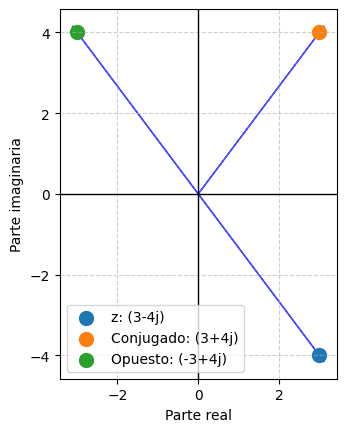

In [75]:
import matplotlib.pyplot as plt

def plot_special_cases(z):
    """
    Grafica un número complejo junto a su conjugado y su opuesto en el plano complejo.
    
    Parámetros:
    -----------
    z : complex
        Número complejo a graficar.
    """
    conj = z.conjugate()
    opp = -z
    
    puntos = {
        "z": z,
        "Conjugado": conj,
        "Opuesto": opp
    }
    
    fig, ax = plt.subplots()
    
    # Graficar cada número como vector desde el origen
    for nombre, valor in puntos.items():
        ax.arrow(0, 0, valor.real, valor.imag,
                 head_width=0.15, head_length=0.2,
                 fc='blue', ec='blue', alpha=0.7)
        ax.scatter(valor.real, valor.imag, s=100, label=f"{nombre}: {valor}")
    
    # Configuración de ejes
    ax.axhline(0, color="black", lw=1)
    ax.axvline(0, color="black", lw=1)
    ax.set_xlabel("Parte real")
    ax.set_ylabel("Parte imaginaria")
    ax.set_aspect("equal", adjustable="box")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)
    plt.show()

z = 3 - 4j
plot_special_cases(z)


## 5. Operaciones básicas con complejos  

Dado $ z = a + bi $ y $ w = c + di $:  

1. **Suma y resta**  
$ (a+bi) \pm (c+di) = (a \pm c) + (b \pm d)i $ 

2. **Multiplicación**  
$ (a+bi)(c+di) = (ac - bd) + (ad+bc)i $

3. **División**  
$ \frac{a+bi}{c+di} = \frac{(a+bi)(c-di)}{c^2+d^2} $


In [76]:
z = 2 + 3j
w = 1 - 4j

suma = z + w
multiplicacion = z * w
division = z / w

suma, multiplicacion, division

((3-1j), (14-5j), (-0.5882352941176471+0.6470588235294118j))

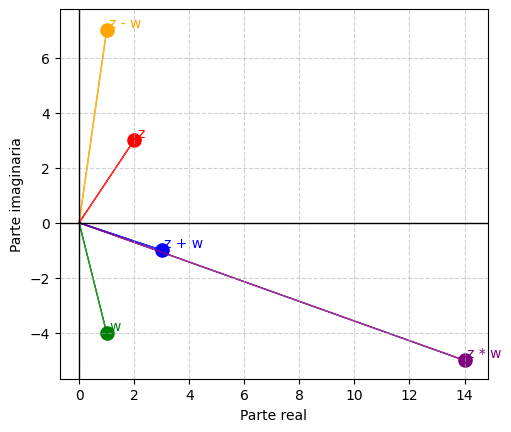

In [78]:
import matplotlib.pyplot as plt

def plot_complex_operations(z, w):
    """
    Muestra operaciones básicas entre dos números complejos:
    suma, resta y multiplicación en el plano complejo.
    
    Parámetros:
    -----------
    z, w : complex
        Números complejos a operar.
    """
    suma = z + w
    resta = z - w
    mult = z * w

    operaciones = {
        "z": z,
        "w": w,
        "z + w": suma,
        "z - w": resta,
        "z * w": mult
    }

    fig, ax = plt.subplots()
    
    colores = ["red", "green", "blue", "orange", "purple"]

    for (nombre, valor), c in zip(operaciones.items(), colores):
        # vector desde el origen
        ax.arrow(0, 0, valor.real, valor.imag,
                 head_width=0.12, head_length=0.15,
                 fc=c, ec=c, alpha=0.8)
        # punto y etiqueta
        ax.scatter(valor.real, valor.imag, color=c, s=90)
        ax.text(valor.real+0.1, valor.imag+0.1, nombre, fontsize=10, color=c)

    # Configuración de ejes
    ax.axhline(0, color="black", lw=1)
    ax.axvline(0, color="black", lw=1)
    ax.set_xlabel("Parte real")
    ax.set_ylabel("Parte imaginaria")
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True, linestyle="--", alpha=0.6)
    plt.show()

z = 2 + 3j
w = 1 - 4j
plot_complex_operations(z, w)


## 6. Forma polar o trigonométrica  

Sea $ z = a+bi $. Definimos:  

- **Módulo**: $ |z| = \sqrt{a^2+b^2} $ 
- **Argumento**: $ \theta = \tan^{-1}(b/a) $ 

Entonces:  
$ z = |z|(\cos \theta + i \sin \theta) $

Notación abreviada:  
$ z = |z| \cdot cis(\theta) $


In [ ]:
import cmath
z = 1 + 1j
modulo = abs(z)
argumento = cmath.phase(z)
modulo, argumento

(1.4142135623730951, 0.7853981633974483)

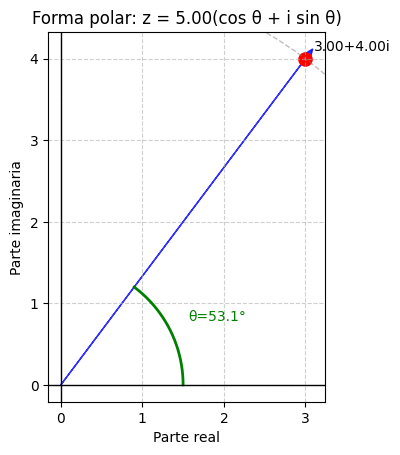

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def plot_complex_polar(z):
    """
    Grafica un número complejo en forma polar:
    muestra el vector, su módulo y el ángulo (argumento).
    
    Parámetros:
    -----------
    z : complex
        Número complejo a graficar.
    """
    r = abs(z)              # módulo
    theta = np.angle(z)     # argumento (en radianes)
    
    fig, ax = plt.subplots()
    
    # Vector principal
    ax.arrow(0, 0, z.real, z.imag,
             head_width=0.12, head_length=0.15,
             fc="blue", ec="blue", alpha=0.8)
    ax.scatter(z.real, z.imag, color="red", s=90)
    ax.text(z.real+0.1, z.imag+0.1, f"{z.real:.2f}+{z.imag:.2f}i", fontsize=10)
    
    # Círculo para mostrar el módulo
    circle = plt.Circle((0,0), r, color="gray", linestyle="--", fill=False, alpha=0.5)
    ax.add_artist(circle)
    
    # Arco para mostrar el ángulo
    arco_theta = np.linspace(0, theta, 200)
    ax.plot(r*0.3*np.cos(arco_theta), r*0.3*np.sin(arco_theta), color="green", lw=2)
    ax.text(r*0.35*np.cos(theta/2), r*0.35*np.sin(theta/2), f"θ={np.degrees(theta):.1f}°", color="green")
    
    # Ejes
    ax.axhline(0, color="black", lw=1)
    ax.axvline(0, color="black", lw=1)
    
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("Parte real")
    ax.set_ylabel("Parte imaginaria")
    ax.grid(True, linestyle="--", alpha=0.6)
    
    plt.title(f"Forma polar: z = {r:.2f}(cos θ + i sin θ)")
    plt.show()

z = 3 + 4j
plot_complex_polar(z)


## 7. Forma exponencial y la fórmula de Euler  

La **identidad de Euler** dice:  

$ e^{i\theta} = \cos\theta + i\sin\theta $  

Así, un complejo se escribe como:  
$ z = |z| e^{i\theta} $


In [81]:
theta = cmath.pi/3
euler = cmath.exp(1j*theta)
euler

(0.5000000000000001+0.8660254037844386j)

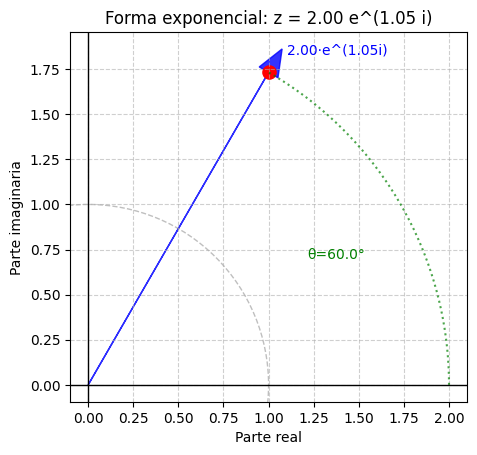

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import cmath

def plot_complex_exponential(z):
    """
    Grafica un número complejo en su forma exponencial:
    z = r * e^{iθ}, mostrando módulo y ángulo.
    
    Parámetros:
    -----------
    z : complex
        Número complejo a graficar.
    """
    r = abs(z)              # módulo
    theta = np.angle(z)     # argumento en radianes
    
    fig, ax = plt.subplots()
    
    # Vector principal
    ax.arrow(0, 0, z.real, z.imag,
             head_width=0.12, head_length=0.15,
             fc="blue", ec="blue", alpha=0.8)
    ax.scatter(z.real, z.imag, color="red", s=90)
    ax.text(z.real+0.1, z.imag+0.1,
            f"{r:.2f}·e^({theta:.2f}i)", fontsize=10, color="blue")
    
    # Arco para mostrar el ángulo
    arco_theta = np.linspace(0, theta, 200)
    ax.plot(r*np.cos(arco_theta), r*np.sin(arco_theta), linestyle=":", color="green", alpha=0.7)
    ax.text(r*0.7*np.cos(theta/2), r*0.7*np.sin(theta/2),
            f"θ={np.degrees(theta):.1f}°", color="green")
    
    # Círculo unitario para enfatizar rotación
    unit_circle = plt.Circle((0,0), 1, color="gray", linestyle="--", fill=False, alpha=0.5)
    ax.add_artist(unit_circle)
    
    # Ejes
    ax.axhline(0, color="black", lw=1)
    ax.axvline(0, color="black", lw=1)
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("Parte real")
    ax.set_ylabel("Parte imaginaria")
    ax.grid(True, linestyle="--", alpha=0.6)
    
    plt.title(f"Forma exponencial: z = {r:.2f} e^({theta:.2f} i)")
    plt.show()

z = cmath.exp(1j*np.pi/3) * 2   # 2·e^(iπ/3)
plot_complex_exponential(z)


## 8. Interpretación de la multiplicación como rotación  

En forma polar o exponencial:  

$ z_1 z_2 = |z_1||z_2| e^{i(\theta_1+\theta_2)} $  

➡️ Multiplicar por $ e^{i\theta} $ **rota** el número complejo un ángulo $ \theta $.  

### Ejemplo:
- Multiplicar por $ e^{i\pi/2} $: rotación 90°.  
- Multiplicar por $ e^{i2\pi/3} $: rotación 120°.  
- Multiplicar por $ e^{i\pi} $: rotación 180°.  


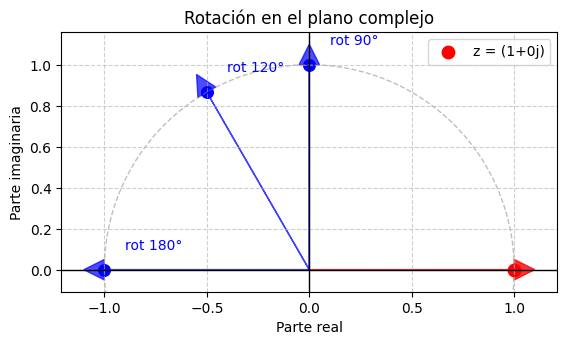

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import cmath

def plot_complex_rotation(z, angles):
    """
    Muestra cómo un número complejo z se rota al multiplicarlo
    por e^{iθ}, para una lista de ángulos.
    
    Parámetros:
    -----------
    z : complex
        Número complejo inicial.
    angles : list
        Lista de ángulos en radianes para aplicar la rotación.
    """
    fig, ax = plt.subplots()
    
    # Punto original
    ax.arrow(0, 0, z.real, z.imag,
             head_width=0.1, head_length=0.1,
             fc="red", ec="red", alpha=0.8)
    ax.scatter(z.real, z.imag, color="red", s=80, label=f"z = {z}")
    
    # Rotaciones
    for theta in angles:
        z_rot = z * cmath.exp(1j*theta)
        ax.arrow(0, 0, z_rot.real, z_rot.imag,
                 head_width=0.1, head_length=0.1,
                 fc="blue", ec="blue", alpha=0.7)
        ax.scatter(z_rot.real, z_rot.imag, s=70, color="blue")
        ax.text(z_rot.real+0.1, z_rot.imag+0.1,
                f"rot {np.degrees(theta):.0f}°", color="blue")
    
    # Círculo para visualizar rotación
    circle = plt.Circle((0,0), abs(z), color="gray", linestyle="--", fill=False, alpha=0.5)
    ax.add_artist(circle)
    
    # Ejes
    ax.axhline(0, color="black", lw=1)
    ax.axvline(0, color="black", lw=1)
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("Parte real")
    ax.set_ylabel("Parte imaginaria")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)
    plt.title("Rotación en el plano complejo")
    plt.show()

z = 1 + 0j   # vector inicial en el eje real
angles = [np.pi/2, 2*np.pi/3, np.pi]   # 90°, 120°, 180°
plot_complex_rotation(z, angles)


## 9. Ejercicios propuestos  

1. Representa $ 3 - 4i $ en forma binómica, polar y exponencial.  
2. Calcula $ (2+i)(3-2i) $ y verifica el resultado en Python.  
3. Determina módulo y argumento de $ z = -1+i\sqrt{3} $.  
4. Demuestra que $ z \cdot \overline{z} = |z|^2 $.  
5. Aplica una rotación de 120° a $ z = 2+i $ usando la forma exponencial.  

---

## 10. Aplicación en Computación Cuántica

Un qubit se escribe como:  

$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $  

donde $ \alpha, \beta \in \mathbb{C} $ y:  

$ |\alpha|^2 + |\beta|^2 = 1 $  

- El **módulo** de cada coeficiente = probabilidad de medir ese estado.  
- El **argumento** (fase) afecta fenómenos de **interferencia**.  
